### İmport sacred libraries

In [212]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


**CLIENTNUM** = Client number. Unique identifier for the customer holding the account

**Attrition_Flag** = Internal event (customer activity) variable - if the account is closed then 1 else 0

**Customer_Age** = Demographic variable - Customer's Age in Years

**Gender** = Demographic variable - M=Male, F=Female

**Dependent_count** = Demographic variable - Number of dependents

**Education_Level** = Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

**Marital_Status** = Demographic variable - Married, Single, Divorced, Unknown

**Income_Category** = Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, $120K >)

**Card_Category** = Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

**Months_on_book** = Period of relationship with bank

**Total_Relationship_Count** = Total no. of products held by the customer

**Months_Inactive_12_mon** = No. of months inactive in the last 12 months

**Contacts_Count_12_mon** = No. of Contacts in the last 12 months

**Credit_Limit** = Credit Limit on the Credit Card

**Total_Revolving_Bal** = Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy** = Open to Buy Credit Line (Average of last 12 months)

**Total_Amt_Chng_Q4_Q1** = Change in Transaction Amount (Q4 over Q1)

**Total_Trans_Amt** = Total Transaction Amount (Last 12 months)

**Total_Trans_Ct** = Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1** = Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio** = Average Card Utilization Ratio

In [213]:
data = pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")
df = data[data.columns[:-2]]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


*Let's first look at the data*

In [214]:
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)

In [215]:
Missing_Values(df)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,CLIENTNUM,10127,0,0.0,int64,"[768805383, 818770008, 713982108, 769911858, 7...",10127
11,Months_Inactive_12_mon,10127,0,0.0,int64,"[1, 4, 2, 3, 6, 0, 5]",7
19,Total_Ct_Chng_Q4_Q1,10127,0,0.0,float64,"[1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714...",830
18,Total_Trans_Ct,10127,0,0.0,int64,"[42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2...",126
17,Total_Trans_Amt,10127,0,0.0,int64,"[1144, 1291, 1887, 1171, 816, 1088, 1330, 1538...",5033
16,Total_Amt_Chng_Q4_Q1,10127,0,0.0,float64,"[1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9...",1158
15,Avg_Open_To_Buy,10127,0,0.0,float64,"[11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763....",6813
14,Total_Revolving_Bal,10127,0,0.0,int64,"[777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14...",1974
13,Credit_Limit,10127,0,0.0,float64,"[12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010...",6205
12,Contacts_Count_12_mon,10127,0,0.0,int64,"[3, 2, 0, 1, 4, 5, 6]",7


In [216]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [217]:
df['Income_Category'].replace({'$60K - $80K': "60k_80k", 'Less than $40K': "0_40k", '$80K - $120K': "80k_120k",
                                        '$40K - $60K': "40k_60k", "$120K +": "120k_plus"}, inplace = True)
df.drop("CLIENTNUM", axis = 1, inplace = True)

In [218]:
df["Income_Category"].unique()

array(['60k_80k', '0_40k', '80k_120k', '40k_60k', '120k_plus', 'Unknown'],
      dtype=object)

### Visualization

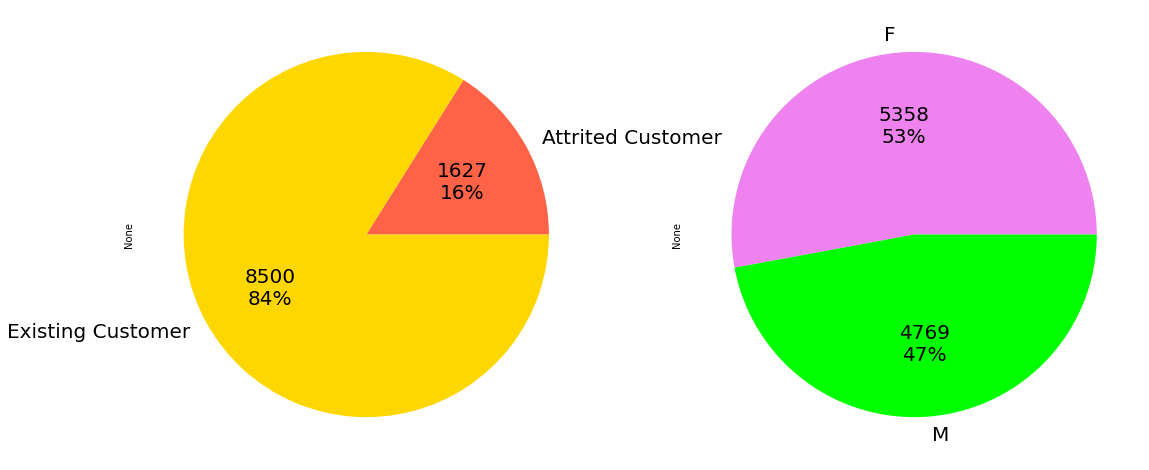

In [219]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 10))
df.groupby("Attrition_Flag").size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'],ax=ax1)

df.groupby("Gender").size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['violet', 'lime'],ax=ax2)

Text(0.5, 1.0, 'CARD CATEGORY & ATTRITION FLAG')

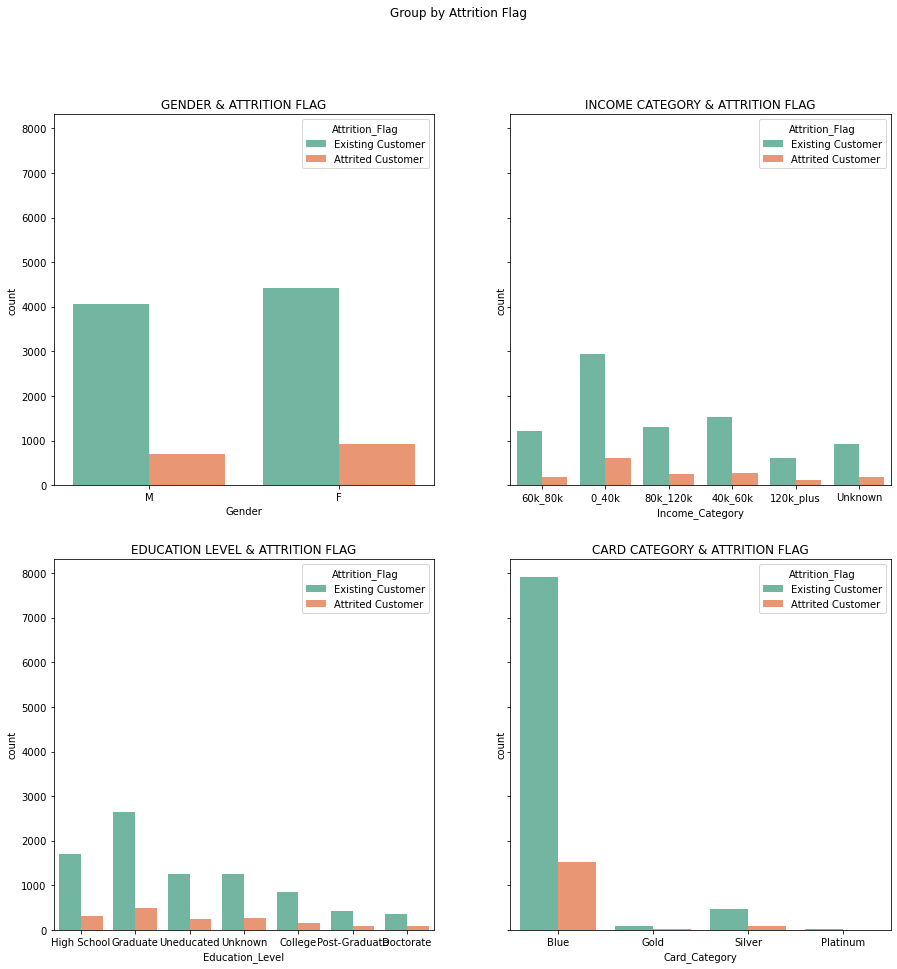

In [220]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Group by Attrition Flag')
sns.countplot(x="Gender", hue = "Attrition_Flag",  data=df, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("GENDER & ATTRITION FLAG")

sns.countplot(x="Income_Category", hue = "Attrition_Flag",  data=df, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("INCOME CATEGORY & ATTRITION FLAG")

sns.countplot(x="Education_Level", hue = "Attrition_Flag",  data=df, ax=axes[1,0], palette="Set2")
axes[1,0].set_title("EDUCATION LEVEL & ATTRITION FLAG")

sns.countplot(x="Card_Category", hue = "Attrition_Flag",  data=df, ax=axes[1,1], palette="Set2")
axes[1,1].set_title("CARD CATEGORY & ATTRITION FLAG")


In [221]:
Missing_Values(df)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,Attrition_Flag,10127,0,0.0,object,"[Existing Customer, Attrited Customer]",2
1,Customer_Age,10127,0,0.0,int64,"[45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 3...",45
18,Total_Ct_Chng_Q4_Q1,10127,0,0.0,float64,"[1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714...",830
17,Total_Trans_Ct,10127,0,0.0,int64,"[42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2...",126
16,Total_Trans_Amt,10127,0,0.0,int64,"[1144, 1291, 1887, 1171, 816, 1088, 1330, 1538...",5033
15,Total_Amt_Chng_Q4_Q1,10127,0,0.0,float64,"[1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9...",1158
14,Avg_Open_To_Buy,10127,0,0.0,float64,"[11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763....",6813
13,Total_Revolving_Bal,10127,0,0.0,int64,"[777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14...",1974
12,Credit_Limit,10127,0,0.0,float64,"[12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010...",6205
11,Contacts_Count_12_mon,10127,0,0.0,int64,"[3, 2, 0, 1, 4, 5, 6]",7


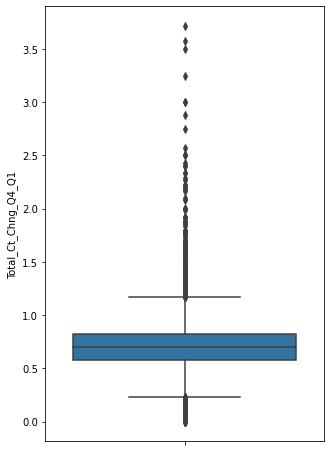

In [222]:
fig = plt.subplots(figsize = (5,8))
sns.boxplot(y=df["Total_Ct_Chng_Q4_Q1"])

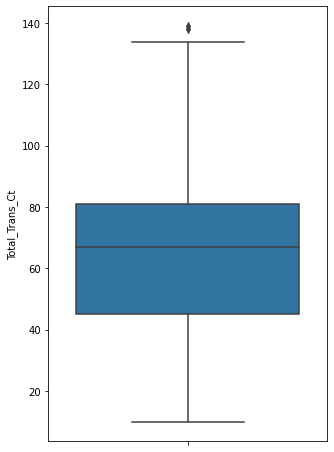

In [223]:
fig = plt.subplots(figsize = (5,8))
sns.boxplot(y=df["Total_Trans_Ct"])

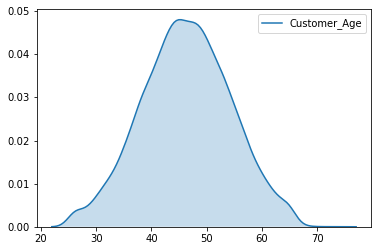

In [224]:
sns.kdeplot(df['Customer_Age'], shade=True)


In [225]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [226]:
columns = ["Customer_Age", 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for column_name in columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 3 * IQR)) |(df[column_name] > (Q3 + 3 * IQR)))]

In [227]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [228]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,Existing Customer,44,M,2,Graduate,Married,40k_60k,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
9,Existing Customer,48,M,2,Graduate,Single,80k_120k,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
10,Existing Customer,42,M,5,Uneducated,Unknown,120k_plus,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
11,Existing Customer,65,M,1,Unknown,Married,40k_60k,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
14,Existing Customer,57,F,2,Graduate,Married,0_40k,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,Attrited Customer,41,M,2,Unknown,Divorced,40k_60k,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,0_40k,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40k_60k,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


There were 10127 row observations before outlier cleanup. We currently have 9240 number of row

### Normality test 

In [229]:
def shapiro_wilk(data):
    columns = df.columns
    int_columns = []
    normality_column_name = []
    normality_statistic = []
    normality_result = []
    for column_type in columns:
        if df[column_type].dtypes == "int64" or df[column_type].dtypes == "float64":
            int_columns.append(column_type)
    for column in int_columns:
        stat, p = shapiro(data[column])
        statistic = ('Statistics=%.3f, p=%.3f' % (stat, p))
        #print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            normality_column_name.append(column)
            normality_statistic.append(statistic)
            normality.append("Sample looks Gaussian")
                    
        else:
            normality_column_name.append(column)
            normality_statistic.append(statistic)
            normality_result.append("Sample does not look Gaussian")
        
    normality_column_name = pd.DataFrame(normality_column_name, columns =['Column Name'])
    normality_statistic = pd.DataFrame(normality_statistic, columns =['Statistic']) 
    normality_result = pd.DataFrame(normality_result, columns =['Result']) 


    result = pd.concat([normality_column_name, normality_statistic, normality_result], axis=1, sort=False)
    
    return result 

In [230]:
shapiro_wilk(df)

,Column Name,Statistic,Result
0,Customer_Age,"Statistics=0.996, p=0.000",Sample does not look Gaussian
1,Dependent_count,"Statistics=0.937, p=0.000",Sample does not look Gaussian
2,Months_on_book,"Statistics=0.977, p=0.000",Sample does not look Gaussian
3,Total_Relationship_Count,"Statistics=0.918, p=0.000",Sample does not look Gaussian
4,Months_Inactive_12_mon,"Statistics=0.870, p=0.000",Sample does not look Gaussian
5,Contacts_Count_12_mon,"Statistics=0.929, p=0.000",Sample does not look Gaussian
6,Credit_Limit,"Statistics=0.729, p=0.000",Sample does not look Gaussian
7,Total_Revolving_Bal,"Statistics=0.913, p=0.000",Sample does not look Gaussian
8,Avg_Open_To_Buy,"Statistics=0.731, p=0.000",Sample does not look Gaussian
9,Total_Amt_Chng_Q4_Q1,"Statistics=0.977, p=0.000",Sample does not look Gaussian


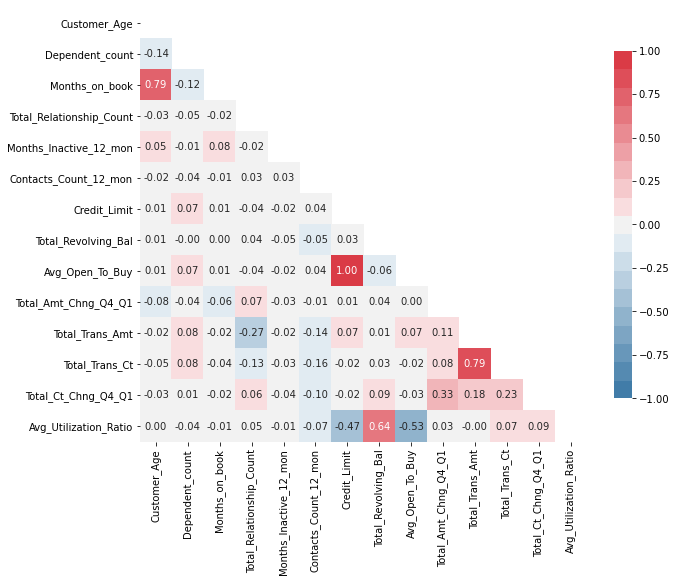

In [231]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# mask = mask[1:, :-1]
# corr = df_corr.iloc[1:,:-1].copy()
sns.heatmap(df_corr, mask = mask, annot = True, fmt = ".2f", cmap = sns.diverging_palette(240, 10, n=19),
           vmin = -1, vmax = 1, cbar_kws = {"shrink": .8})




There is high correlation between Avg Open To buy and Credit Limit

Credit_Limit = Credit Limit on the Credit Card

Avg_Open_To_Buy = Open to Buy Credit Line (Average of last 12 months)

In [232]:
df[["Credit_Limit", "Avg_Open_To_Buy"]]

,Credit_Limit,Avg_Open_To_Buy
5,4010.0,2763.0
9,11656.0,9979.0
10,6748.0,5281.0
11,9095.0,7508.0
14,2436.0,1756.0
...,...,...
10119,14657.0,12140.0
10123,4277.0,2091.0
10124,5409.0,5409.0
10125,5281.0,5281.0


In [233]:
df.drop("Credit_Limit", axis = 1, inplace = True)

# TRAIN - VALIDATION - TEST Split

prepare the data set

In [234]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [235]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer':1, 'Existing Customer':0})

Get dummy variables

In [236]:
df_dummies = pd.get_dummies(df)

In [237]:
df_dummies

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_0_40k,Income_Category_120k_plus,Income_Category_40k_60k,Income_Category_60k_80k,Income_Category_80k_120k,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
5,0,44,2,36,3,1,2,1247,2763.0,1.376,...,0,0,1,0,0,0,1,0,0,0
9,0,48,2,36,6,3,3,1677,9979.0,1.524,...,0,0,0,0,1,0,1,0,0,0
10,0,42,5,31,5,3,2,1467,5281.0,0.831,...,0,1,0,0,0,0,1,0,0,0
11,0,65,1,54,6,2,3,1587,7508.0,1.433,...,0,0,1,0,0,0,1,0,0,0
14,0,57,2,48,5,2,2,680,1756.0,1.190,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,1,55,3,47,4,3,3,2517,12140.0,0.166,...,0,0,0,0,0,1,1,0,0,0
10123,1,41,2,25,4,2,3,2186,2091.0,0.804,...,0,0,1,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,4,0,5409.0,0.819,...,1,0,0,0,0,0,1,0,0,0
10125,1,30,2,36,4,3,3,0,5281.0,0.535,...,0,0,1,0,0,0,1,0,0,0


In [238]:
X = df_dummies.drop("Attrition_Flag", axis = 1)
y = df_dummies["Attrition_Flag"]

In [239]:
X.shape

(9240, 36)

In [240]:
y.shape

(9240,)

In [241]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train - Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# Test = 0.20
# Validation = 0.20
# Train = 0.60

x_train_shape = X_train.shape
x_val_shape = X_val.shape
x_test_shape = X_test.shape
print("X_train shape = {}\nX_val shape = {}\nX_test shape = {}".format(x_train_shape, x_val_shape, x_test_shape))

X_train shape = (5544, 36)
X_val shape = (1848, 36)
X_test shape = (1848, 36)


In [242]:
modeller = []
modelName = []

        
def dictforloop(index,accuracy,recall,f1):
    dictForPlot = []
    dictForList =[]
    
    dictForPlot.append({"Model_Name":index,"ScoreType":"accuracy","Score":accuracy})
    dictForPlot.append({"Model_Name":index,"ScoreType":"Recall_Score_0","Score":recall[0]}) 
    dictForPlot.append({"Model_Name":index,"ScoreType":"Recall_Score_1","Score":recall[1]})
    dictForPlot.append({"Model_Name":index,"ScoreType":"F1_Score_0","Score":f1[0]}) 
    dictForPlot.append({"Model_Name":index,"ScoreType":"F1_Score_1","Score":f1[1]})
    
    dictForList = {"Model_Name":index,"Accuracy":accuracy,"Recall_Score_0":recall[0],
              "Recall_Score_1":recall[1],"F1_Score_0":f1[0],"F1_Score_1":f1[1]}
    
    return dictForPlot,dictForList
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)    
def importance_plot(model_name, thresh_hold):
    Importance=pd.DataFrame({"Importance":model_name.feature_importances_*100},
                       index=X_train.columns)
    importance = Importance.sort_values(by="Importance",
                      axis=0,ascending=False).iloc[0:10,:]
    importance.sort_values(by="Importance",
                      axis=0,ascending=True).plot(kind="barh",color="r")
    plt.xlabel("Değişken Önem Düzeyleri")


    a = Importance.sort_values("Importance", ascending = False)
    display_all(a[a['Importance']>thresh_hold])

def conf_mtrx(y_test, y_pred, model): 

    cm = confusion_matrix(y_test,y_pred)    
    f, ax = plt.subplots(figsize =(5,5))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot = True, linewidths=0.5, linecolor="red",fmt = ".0f",ax=ax)#,cmap=plt.cm.RdPu
    plt.xlabel("predicted y values")
    plt.ylabel("real y values")
    plt.title("\nConfusion Matrix")
    plt.show()
    
def rc_recis_scres(y_test, y_pred, algorithm_name):
    from sklearn.metrics import recall_score,precision_score,accuracy_score, f1_score

    rs=recall_score(y_test, y_pred) 
    ps=precision_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    print()    

def roc_auc_curve_plot(model_name, X_testt, y_testt):
    ns_probs = [0 for _ in range(len(y_testt))]
    # fit a model
    # predict probabilities
    model_probs = model_name.predict_proba(X_testt)
    # keep probabilities for the positive outcome only
    model_probs = model_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_testt, ns_probs)
    lr_auc = roc_auc_score(y_testt, model_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print( ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_testt, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_testt, model_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show() 
    
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, label = roc_auc_score) 
    plt.plot([0,1],ls='--')
    plt.plot([0,0],[1,0],c='.5')
    plt.plot([1,1],c='.5')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   
    
def ML_Algorithms(model,alg_name, x_trainn,x_testt, y_trainn, y_testt):
    from sklearn.metrics import roc_auc_score,roc_curve
    
    modell = model()
    result_model = modell.fit(x_trainn, y_trainn)
    y_pred = result_model.predict(x_testt)    
    conf_mtrx(y_testt, y_pred, model)
    print("*****",alg_name," ALGORITHM:") 
    rc_recis_scres(y_testt, y_pred, alg_name)
    
    
    
    modeller.append(result_model)
    modelName.append(alg_name)
    
    print("classification_report\n",classification_report(y_testt, y_pred))
    print("Accuracy Score for ", alg_name ,accuracy_score(y_testt, y_pred))
    
    tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    y_probs = modell.predict_proba(x_testt)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    probs = modell.predict_proba(X_test)
    probs = probs[:, 1]
    
    print()
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    #plot_roc_curve(fpr, tpr)
    return model  

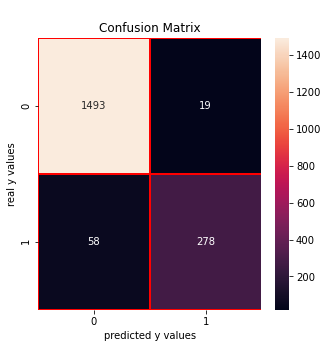

***** Random Forest Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1512
           1       0.94      0.83      0.88       336

    accuracy                           0.96      1848
   macro avg       0.95      0.91      0.93      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  Random Forest Classifier 0.9583333333333334

AUC: 0.98


sklearn.ensemble._forest.RandomForestClassifier

In [243]:
ML_Algorithms(RandomForestClassifier, "Random Forest Classifier", X_train, X_val, y_train, y_val)

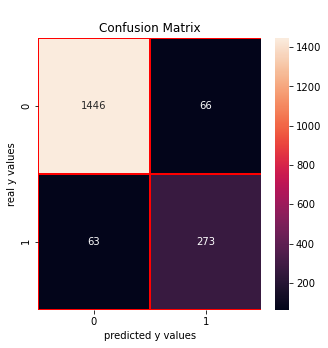

***** Decision Tree Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1512
           1       0.81      0.81      0.81       336

    accuracy                           0.93      1848
   macro avg       0.88      0.88      0.88      1848
weighted avg       0.93      0.93      0.93      1848

Accuracy Score for  Decision Tree Classifier 0.9301948051948052

AUC: 0.87


sklearn.tree._classes.DecisionTreeClassifier

In [244]:
ML_Algorithms(DecisionTreeClassifier, "Decision Tree Classifier", X_train, X_val, y_train, y_val)

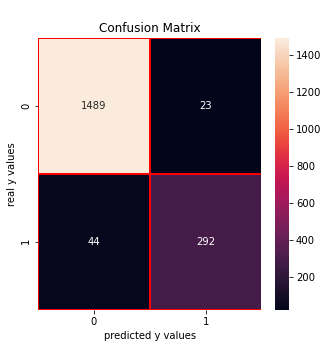

***** Gradient Boosting Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1512
           1       0.93      0.87      0.90       336

    accuracy                           0.96      1848
   macro avg       0.95      0.93      0.94      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  Gradient Boosting Classifier 0.9637445887445888

AUC: 0.99


sklearn.ensemble._gb.GradientBoostingClassifier

In [245]:
ML_Algorithms(GradientBoostingClassifier, "Gradient Boosting Classifier", X_train, X_val, y_train, y_val)

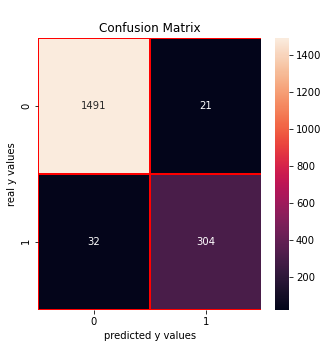

***** XGB Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.94      0.90      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  XGB Classifier 0.9713203463203464

AUC: 0.99


xgboost.sklearn.XGBClassifier

In [246]:
ML_Algorithms(XGBClassifier, "XGB Classifier", X_train, X_val, y_train, y_val)

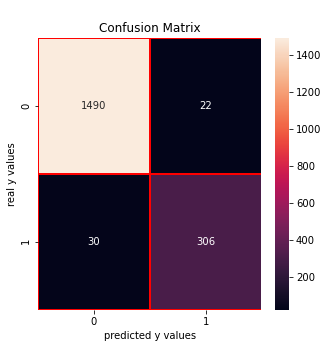

***** LGBM Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.93      0.91      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  LGBM Classifier 0.9718614718614719

AUC: 0.99


lightgbm.sklearn.LGBMClassifier

In [247]:
ML_Algorithms(LGBMClassifier, "LGBM Classifier", X_train, X_val, y_train, y_val)

Learning rate set to 0.021407
0:	learn: 0.6666471	total: 6.92ms	remaining: 6.92s
1:	learn: 0.6405367	total: 12.4ms	remaining: 6.2s
2:	learn: 0.6154077	total: 17.9ms	remaining: 5.96s
3:	learn: 0.5904404	total: 23.5ms	remaining: 5.84s
4:	learn: 0.5663883	total: 29.2ms	remaining: 5.8s
5:	learn: 0.5467634	total: 34.6ms	remaining: 5.74s
6:	learn: 0.5282217	total: 40.3ms	remaining: 5.71s
7:	learn: 0.5050576	total: 45.8ms	remaining: 5.68s
8:	learn: 0.4842652	total: 51.4ms	remaining: 5.66s
9:	learn: 0.4689348	total: 57.1ms	remaining: 5.65s
10:	learn: 0.4563895	total: 62.9ms	remaining: 5.66s
11:	learn: 0.4413074	total: 68.6ms	remaining: 5.65s
12:	learn: 0.4243407	total: 74.4ms	remaining: 5.64s
13:	learn: 0.4093290	total: 80ms	remaining: 5.63s
14:	learn: 0.3967075	total: 85.6ms	remaining: 5.62s
15:	learn: 0.3878783	total: 91.1ms	remaining: 5.6s
16:	learn: 0.3780839	total: 96.9ms	remaining: 5.6s
17:	learn: 0.3689272	total: 103ms	remaining: 5.61s
18:	learn: 0.3591773	total: 108ms	remaining: 5.6s
1

162:	learn: 0.1154888	total: 995ms	remaining: 5.11s
163:	learn: 0.1150346	total: 1s	remaining: 5.11s
164:	learn: 0.1147682	total: 1.01s	remaining: 5.1s
165:	learn: 0.1144429	total: 1.01s	remaining: 5.09s
166:	learn: 0.1140974	total: 1.02s	remaining: 5.08s
167:	learn: 0.1136670	total: 1.02s	remaining: 5.08s
168:	learn: 0.1133064	total: 1.03s	remaining: 5.06s
169:	learn: 0.1128577	total: 1.04s	remaining: 5.06s
170:	learn: 0.1123652	total: 1.04s	remaining: 5.06s
171:	learn: 0.1119970	total: 1.05s	remaining: 5.05s
172:	learn: 0.1116763	total: 1.05s	remaining: 5.04s
173:	learn: 0.1113818	total: 1.06s	remaining: 5.03s
174:	learn: 0.1110473	total: 1.06s	remaining: 5.02s
175:	learn: 0.1107839	total: 1.07s	remaining: 5.01s
176:	learn: 0.1105716	total: 1.08s	remaining: 5.01s
177:	learn: 0.1102602	total: 1.08s	remaining: 5.01s
178:	learn: 0.1100097	total: 1.09s	remaining: 5s
179:	learn: 0.1095612	total: 1.1s	remaining: 5s
180:	learn: 0.1092581	total: 1.1s	remaining: 4.99s
181:	learn: 0.1088682	to

336:	learn: 0.0772273	total: 1.99s	remaining: 3.91s
337:	learn: 0.0771188	total: 1.99s	remaining: 3.9s
338:	learn: 0.0770080	total: 2s	remaining: 3.9s
339:	learn: 0.0767335	total: 2s	remaining: 3.89s
340:	learn: 0.0766389	total: 2.01s	remaining: 3.88s
341:	learn: 0.0765025	total: 2.01s	remaining: 3.87s
342:	learn: 0.0763514	total: 2.02s	remaining: 3.87s
343:	learn: 0.0761916	total: 2.02s	remaining: 3.86s
344:	learn: 0.0761131	total: 2.03s	remaining: 3.85s
345:	learn: 0.0759254	total: 2.03s	remaining: 3.84s
346:	learn: 0.0757655	total: 2.04s	remaining: 3.84s
347:	learn: 0.0755987	total: 2.04s	remaining: 3.83s
348:	learn: 0.0754354	total: 2.05s	remaining: 3.82s
349:	learn: 0.0753465	total: 2.05s	remaining: 3.81s
350:	learn: 0.0751551	total: 2.06s	remaining: 3.81s
351:	learn: 0.0750933	total: 2.06s	remaining: 3.8s
352:	learn: 0.0749674	total: 2.07s	remaining: 3.79s
353:	learn: 0.0748619	total: 2.08s	remaining: 3.79s
354:	learn: 0.0747042	total: 2.08s	remaining: 3.78s
355:	learn: 0.0745861

509:	learn: 0.0562563	total: 2.98s	remaining: 2.86s
510:	learn: 0.0561349	total: 2.98s	remaining: 2.86s
511:	learn: 0.0560288	total: 2.99s	remaining: 2.85s
512:	learn: 0.0558983	total: 3s	remaining: 2.84s
513:	learn: 0.0557977	total: 3s	remaining: 2.84s
514:	learn: 0.0557222	total: 3.01s	remaining: 2.83s
515:	learn: 0.0556581	total: 3.01s	remaining: 2.83s
516:	learn: 0.0555873	total: 3.02s	remaining: 2.82s
517:	learn: 0.0555331	total: 3.03s	remaining: 2.81s
518:	learn: 0.0554677	total: 3.03s	remaining: 2.81s
519:	learn: 0.0553421	total: 3.04s	remaining: 2.8s
520:	learn: 0.0552510	total: 3.04s	remaining: 2.79s
521:	learn: 0.0551366	total: 3.05s	remaining: 2.79s
522:	learn: 0.0550018	total: 3.05s	remaining: 2.78s
523:	learn: 0.0549111	total: 3.06s	remaining: 2.78s
524:	learn: 0.0547994	total: 3.06s	remaining: 2.77s
525:	learn: 0.0547048	total: 3.07s	remaining: 2.77s
526:	learn: 0.0546101	total: 3.07s	remaining: 2.76s
527:	learn: 0.0545149	total: 3.08s	remaining: 2.75s
528:	learn: 0.05441

676:	learn: 0.0435685	total: 3.97s	remaining: 1.9s
677:	learn: 0.0435238	total: 3.98s	remaining: 1.89s
678:	learn: 0.0434725	total: 3.98s	remaining: 1.88s
679:	learn: 0.0434415	total: 3.99s	remaining: 1.88s
680:	learn: 0.0434021	total: 4.01s	remaining: 1.88s
681:	learn: 0.0433632	total: 4.01s	remaining: 1.87s
682:	learn: 0.0432936	total: 4.02s	remaining: 1.87s
683:	learn: 0.0432276	total: 4.03s	remaining: 1.86s
684:	learn: 0.0431524	total: 4.04s	remaining: 1.85s
685:	learn: 0.0430755	total: 4.04s	remaining: 1.85s
686:	learn: 0.0430272	total: 4.05s	remaining: 1.84s
687:	learn: 0.0429511	total: 4.05s	remaining: 1.84s
688:	learn: 0.0428987	total: 4.06s	remaining: 1.83s
689:	learn: 0.0428373	total: 4.07s	remaining: 1.83s
690:	learn: 0.0428054	total: 4.07s	remaining: 1.82s
691:	learn: 0.0427159	total: 4.08s	remaining: 1.81s
692:	learn: 0.0426687	total: 4.08s	remaining: 1.81s
693:	learn: 0.0426250	total: 4.09s	remaining: 1.8s
694:	learn: 0.0425826	total: 4.09s	remaining: 1.8s
695:	learn: 0.0

843:	learn: 0.0351807	total: 4.96s	remaining: 918ms
844:	learn: 0.0351444	total: 4.97s	remaining: 912ms
845:	learn: 0.0350693	total: 4.98s	remaining: 906ms
846:	learn: 0.0350426	total: 4.99s	remaining: 900ms
847:	learn: 0.0349958	total: 4.99s	remaining: 895ms
848:	learn: 0.0349618	total: 5s	remaining: 889ms
849:	learn: 0.0349047	total: 5s	remaining: 883ms
850:	learn: 0.0348840	total: 5.01s	remaining: 878ms
851:	learn: 0.0348162	total: 5.02s	remaining: 872ms
852:	learn: 0.0347613	total: 5.03s	remaining: 866ms
853:	learn: 0.0347418	total: 5.03s	remaining: 860ms
854:	learn: 0.0346887	total: 5.04s	remaining: 855ms
855:	learn: 0.0346542	total: 5.05s	remaining: 849ms
856:	learn: 0.0346066	total: 5.05s	remaining: 843ms
857:	learn: 0.0345789	total: 5.06s	remaining: 837ms
858:	learn: 0.0345440	total: 5.06s	remaining: 831ms
859:	learn: 0.0345115	total: 5.07s	remaining: 825ms
860:	learn: 0.0344812	total: 5.07s	remaining: 819ms
861:	learn: 0.0344451	total: 5.08s	remaining: 813ms
862:	learn: 0.0344

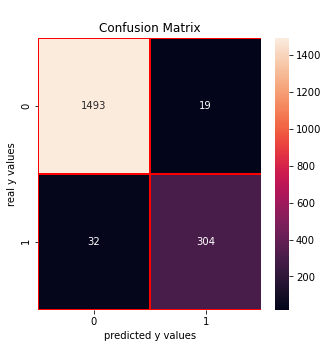

***** CatBoost Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.94      0.90      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  CatBoost Classifier 0.9724025974025974

AUC: 0.99


catboost.core.CatBoostClassifier

In [248]:
ML_Algorithms(CatBoostClassifier, "CatBoost Classifier", X_train, X_val, y_train, y_val)

,Model_Name,Accuracy,Recall_Score_0,Recall_Score_1,F1_Score_0,F1_Score_1
0,Random Forest Classifier,0.958333,0.987434,0.827381,0.974861,0.878357
1,Decision Tree Classifier,0.930195,0.956349,0.812500,0.957299,0.808889
2,Gradient Boosting Classifier,0.963745,0.984788,0.869048,0.977997,0.897081
3,XGB Classifier,0.971320,0.986111,0.904762,0.982537,0.919818
4,LGBM Classifier,0.971861,0.985450,0.910714,0.982850,0.921687


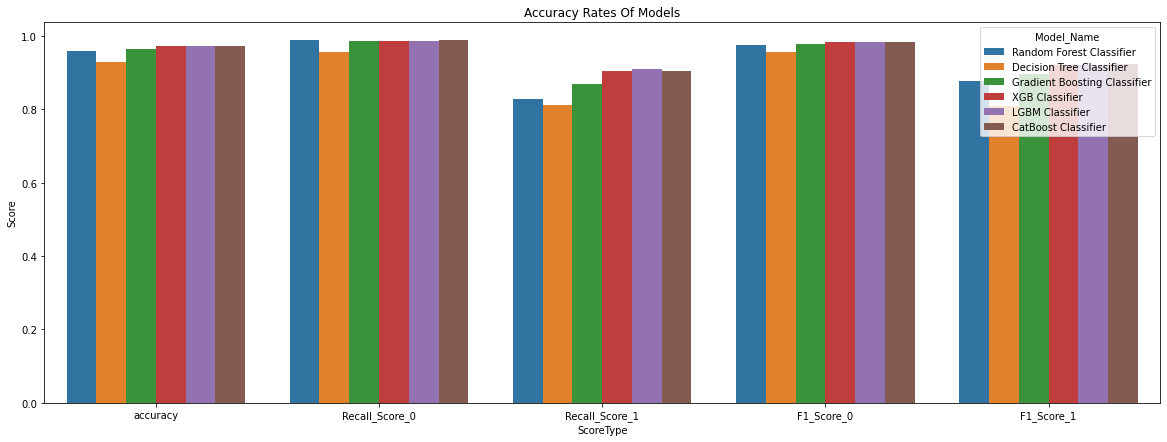

In [249]:
dictForPlot=[]
dictForDf = []
for i in range(len(modeller)):
    isim = modelName[i]
    y_pred = modeller[i].predict(X_val)
    
    ac = accuracy_score(y_val, y_pred)
    recallscore = recall_score(y_val, y_pred,average=None)
    f1score = f1_score(y_val, y_pred,average=None)
    
    szFp,szFl=dictforloop(isim,ac,recallscore,f1score)
    dictForPlot=dictForPlot + szFp
    dictForDf.append(szFl)
    
dictPlotDf = pd.DataFrame(dictForPlot)
dictListDf = pd.DataFrame(dictForDf)

figg=plt.figure(figsize=(20,7))
plt.title('Accuracy Rates Of Models');    

sns.barplot(x="ScoreType",y = "Score",hue ="Model_Name" , data = dictPlotDf);
dictListDf.head()

##### I will focus on 2 models for  tuned phase and these are Random Forest and LGBM

# Model Tuning 

# Random Forest

In [250]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)



print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1512
           1       0.93      0.82      0.87       336

    accuracy                           0.96      1848
   macro avg       0.95      0.90      0.92      1848
weighted avg       0.95      0.96      0.95      1848

Accuracy Score for  0.9556277056277056


In [251]:
rf = RandomForestClassifier(class_weight ="balanced")
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)



print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1512
           1       0.94      0.77      0.85       336

    accuracy                           0.95      1848
   macro avg       0.94      0.88      0.91      1848
weighted avg       0.95      0.95      0.95      1848

Accuracy Score for  0.9485930735930735


,Importance
Total_Trans_Amt,20.650544
Total_Trans_Ct,16.809866
Total_Revolving_Bal,10.961082
Total_Ct_Chng_Q4_Q1,10.339548
Avg_Utilization_Ratio,7.224644
Total_Amt_Chng_Q4_Q1,5.965540
Total_Relationship_Count,4.843435
Avg_Open_To_Buy,4.049569
Months_Inactive_12_mon,3.030313
Customer_Age,2.962455


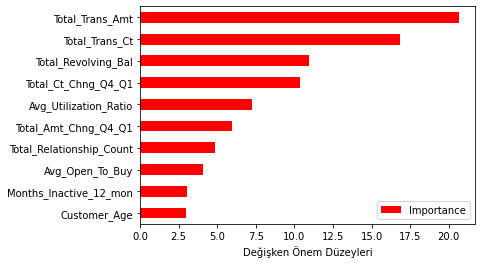

In [252]:
importance_plot(rf_model, 1)


In [ ]:
n_estimators = [100, 300, 500, 800, 1200, 2000]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 




grid_param = dict(n_estimators = n_estimators, max_depth = max_depth, 
                  min_samples_split = min_samples_split, 
                  min_samples_leaf = min_samples_leaf,
                  )

rf_tuned = GridSearchCV(rf, grid_param, cv = 5, verbose = 2, 
                      n_jobs = -1)
rf_tuned = rf_tuned.fit(X_train, y_train)

In [ ]:
rf_tuned.best_params_

rf_tuned.best_params_ = (max_depth= 15, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 800)

In [253]:
rf = RandomForestClassifier(max_depth= 15, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 800)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)



print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1512
           1       0.93      0.82      0.87       336

    accuracy                           0.96      1848
   macro avg       0.95      0.90      0.92      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  0.9561688311688312


In [254]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = rf_model.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.35, 1, 0) # This will threshold the probabilities to give class predictions.

print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1512
           1       0.85      0.94      0.89       336

    accuracy                           0.96      1848
   macro avg       0.92      0.95      0.93      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  0.9594155844155844


## Time to get test with test data

In [255]:
final_model_name = []
final_model_ac = []
final_model_recall = []
final_model_f1 = []

ac = accuracy_score(y_test, y_pred)
recallscore = recall_score(y_test, y_pred,average=None)
f1score = f1_score(y_test, y_pred,average=None)

In [256]:
rf = RandomForestClassifier(max_depth= 15, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 800)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = rf_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.35, 1, 0) # This will threshold the probabilities to give class predictions.


ac_rf = accuracy_score(y_test, y_pred)
recallscore_rf = recall_score(y_test, y_pred,average=None)
f1score_rf = f1_score(y_test, y_pred,average=None)

final_model_name.append("Random Forest")
final_model_ac.append(ac_rf)
final_model_recall.append(recallscore_rf)
final_model_f1.append(f1score_rf)


print("classification_report\n",classification_report(y_test, y_pred))
print("Accuracy Score for ",accuracy_score(y_test, y_pred))



classification_report
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1526
           1       0.84      0.89      0.86       322

    accuracy                           0.95      1848
   macro avg       0.91      0.92      0.92      1848
weighted avg       0.95      0.95      0.95      1848

Accuracy Score for  0.9502164502164502


##### Random Forest
Accuracy Score for 0.9502164502164502,

Recall Score is 0.89 for 1

No Skill: ROC AUC=0.500
: ROC AUC=0.983


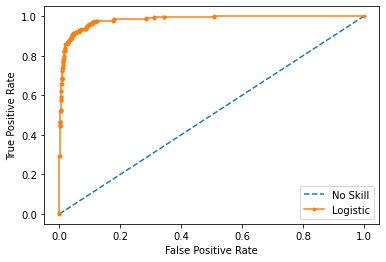

In [257]:
roc_auc_curve_plot(rf_model,X_test, y_test)

#### Feature İmportance

,Importance
Total_Trans_Amt,21.733761
Total_Trans_Ct,15.919887
Total_Revolving_Bal,11.653049
Total_Ct_Chng_Q4_Q1,11.155419
Avg_Utilization_Ratio,7.273044
Total_Relationship_Count,6.465948
Total_Amt_Chng_Q4_Q1,5.823736
Avg_Open_To_Buy,3.381891
Customer_Age,2.698129
Months_Inactive_12_mon,2.663805


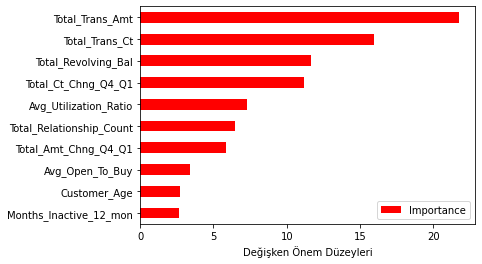

In [258]:
importance_plot(rf_model, 1)

# LGBM

In [259]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_val)

print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred)),

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.93      0.91      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  0.9718614718614719


(None,)

,Importance
Total_Trans_Amt,67300
Total_Amt_Chng_Q4_Q1,37100
Total_Trans_Ct,30600
Total_Ct_Chng_Q4_Q1,28600
Avg_Open_To_Buy,21500
Total_Revolving_Bal,19100
Customer_Age,17700
Months_on_book,15900
Total_Relationship_Count,15900
Contacts_Count_12_mon,10000


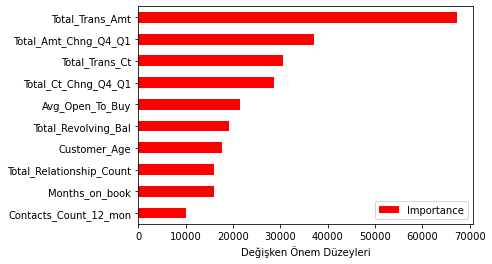

In [260]:
importance_plot(lgbm_model, 1000)

In [ ]:
lgbm_params = {'learning_rate': np.arange(0.0, 1.0, 0.1),
                 'max_depth': [5,10,15,25,30,40,50,70,100],
                 'num_leaves': [10,20,30,40,50,60,70,90,100,120],
                 'feature_fraction': np.arange(0.0, 1.0, 0.1),
                 'subsample': np.arange(0.2, 1.0, 0.1)}



lgbm_tuned = GridSearchCV(lgbm, lgbm_params, cv = 5, verbose = 2, 
                      n_jobs = -1)
lgbm_tuned = lgbm_tuned.fit(X_train, y_train)

In [ ]:
lgbm_tuned.best_params_

 lgbm_tuned.best_params_ = {'feature_fraction': 0.7,
 'learning_rate': 0.5,
 'max_depth': 15,
 'num_leaves': 20,
 'subsample': 0.2}

In [261]:
lgbm = LGBMClassifier(feature_fraction= 0.7, learning_rate= 0.5, max_depth= 15, num_leaves= 20, subsample= 0.2)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_val)


print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.94      0.90      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.94      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  0.9718614718614719


In [262]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = lgbm_model.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1512
           1       0.94      0.90      0.92       336

    accuracy                           0.97      1848
   macro avg       0.96      0.94      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  0.9718614718614719


In [263]:
lgbm = LGBMClassifier(feature_fraction= 0.7, learning_rate= 0.5, max_depth= 15, num_leaves= 20, subsample= 0.2)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_val)

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = lgbm_model.predict_proba(X_val)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.40, 1, 0) # This will threshold the probabilities to give class predictions.


print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1512
           1       0.93      0.91      0.92       336

    accuracy                           0.97      1848
   macro avg       0.95      0.95      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  0.9707792207792207


### Time to get test with test data

In [264]:
lgbm = LGBMClassifier(feature_fraction= 0.7, learning_rate= 0.5, max_depth= 15, num_leaves= 20, subsample= 0.2)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = lgbm_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.40, 1, 0) # This will threshold the probabilities to give class predictions.


ac_lgbm = accuracy_score(y_test, y_pred)
recallscore_lgbm = recall_score(y_test, y_pred,average=None)
f1score_lgbm = f1_score(y_test, y_pred,average=None)

final_model_name.append("LGBM")
final_model_ac.append(ac_lgbm)
final_model_recall.append(recallscore_lgbm)
final_model_f1.append(f1score_lgbm)


print("classification_report\n",classification_report(y_test, y_pred))
print("Accuracy Score for ",accuracy_score(y_test, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1526
           1       0.93      0.90      0.91       322

    accuracy                           0.97      1848
   macro avg       0.95      0.94      0.95      1848
weighted avg       0.97      0.97      0.97      1848

Accuracy Score for  0.9702380952380952


##### LGBM
Accuracy Score for 0.9702380952380952,

Recall Score is 0.90 for 1

No Skill: ROC AUC=0.500
: ROC AUC=0.994


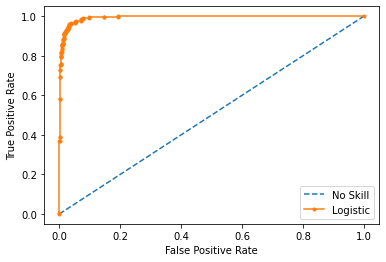

In [265]:
roc_auc_curve_plot(lgbm_model,X_test, y_test)

In [266]:
final_model_name_df = pd.DataFrame(final_model_name, columns=['Model Name'])
final_model_ac_df = pd.DataFrame(final_model_ac, columns=['Model Accuracy Score'])
final_model_recall_df = pd.DataFrame(final_model_recall, columns=['Recall  0', "Recall 1"])
final_model_f1_df = pd.DataFrame(final_model_f1, columns=['F1  0', "F1 1"])
final_model_result = pd.concat([final_model_name_df, final_model_ac_df, final_model_recall_df, final_model_f1_df], axis = 1)
final_model_result

,Model Name,Model Accuracy Score,Recall 0,Recall 1,F1 0,F1 1
0,Random Forest,0.950216,0.963958,0.885093,0.969677,0.861027
1,LGBM,0.970238,0.985583,0.897516,0.982044,0.913112


As a result our best model is LGBM and Model Accuracy Score 0.97023 ~ **97**, For 1's Recall is 0.897516 ~ **90**.